# Visualise data retrieved from CSV 

@Liubov

Here we visualise and analyse data retrieved from online resource http://www.eia.gov/dnav/ng/hist/rngwhhdm.htm



The idea of notebook is to show how one can:
1. [Loading data](#load-data)
2. [Visualizing time series data](#visualise) using standard approaches 
3. [Moving average, Rolling windows](#moveav)
4. [Seasonality, Frequencies, Trends in data time-series](#trend) on detection of seasonality applying simple Fourier transform
5. [Autocorrelation](#autocor) autocorrelation analysis in order to detect memory effects (additional in process)


# 1. Load data  <a name="load-data"></a>

First let us load the data from our csv file (we consider it for daily prices.

In [16]:

import pickle
import numpy as np
import csv
import datetime
import pandas as pd
import os, os.path
import re

# Load data from file 
filepath = "dailyprice.csv"

# Create the dataframe where everything will be stored
data = pd.read_csv(filepath)# , error_bad_lines=False, quotechar=',') #field delimiter is ','  new line "\n"

print(data.shape)

data.head()

(5832, 3)


,Unnamed: 0,Date,Price
0,2,1997-01-07,3.82
1,3,1997-01-08,3.80
2,4,1997-01-09,3.61
3,5,1997-01-10,3.92
4,6,1997-01-13,4.00


# 2. Vizualize time-series  <a name="visualise"></a>
Now that we loaded our data as `dataframe` using python module `pandas` we can finally look inside the data. How we are going to do it? There are many ways. We can use standard python `matplotlib` libraries for this first. 

plotting time series from variables


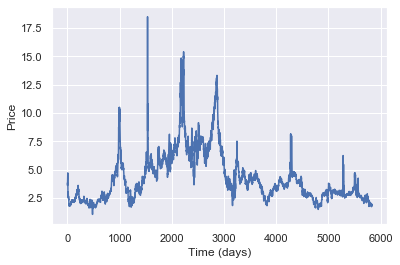

In [17]:
# Plot variables 

import pandas as pd
from matplotlib import pyplot as plt


print('plotting time series from variables')

plt.plot(data.Price.values) #array[:,1])
plt.ylabel('Price')
plt.xlabel('Time (days)')
plt.show()

# Distributions of data values

One may also want to plot distributions of time-series instead of sequence of time-series in time. Distributions may reveal other data properties.

In [18]:
import seaborn as sns, numpy as np
sns.set()

#For identifying NaN values use boolean indexing:
print(data[data['Price'].isnull()])


      Unnamed: 0        Date  Price
5284        5286  2018-01-05    NaN


In [19]:

#Then  remove all not numeric values 
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')


In [20]:

#Remove all rows with NaNs in column x use dropna:

data = data.dropna(subset=['Price'])
data['Price'] = data['Price'].astype(int)




3.7305779454639
3.0


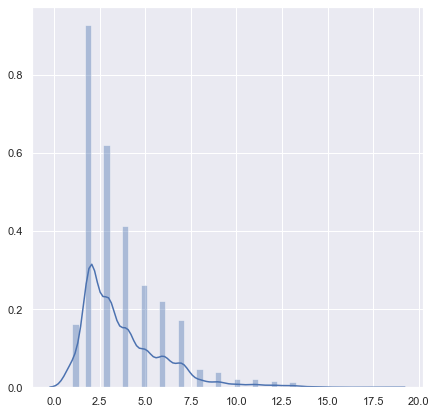

In [21]:
#plotting

f, ax = plt.subplots(figsize=(7, 7))
#ax.set( yscale="log")
ax = sns.distplot(data.Price.values)


print(np.mean(data.Price.values))
print(np.median(data.Price.values))#

# Alternative ways to visualise data 
Alternatively to visualising data as time-series, we can present them also as **distance matrices**, or recurrence plots. This can also highlight some similarities in data time-series for different variables. For definitions go to notebook `distance matrix `.

$M_{ij} = (P(t_i)-P(t_j))$

Some insights which we can get from the visualisation - we see how in some moments there are growining differences between neighboring time-series.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Calculate distance matrix 

def distance_matrix(time_series):
    '''
    input: time-series to which we calculate time_series(t_i) - time_series(t_j)
    output: distance matrix plotted in grey scales
    '''
    
    Time = len(time_series)
    
    dist_mat = np.zeros((Time, Time))
    
    for ind in range(0,Time):
        for knd in range(0,Time): #loop through all values
            dist_mat[ind,knd] = (time_series[ind] - time_series [knd]) # can be also absolute value
    
    return dist_mat

<Figure size 640x480 with 0 Axes>

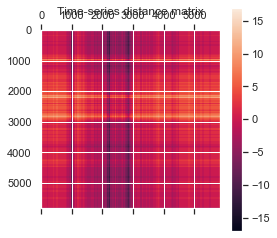

In [23]:


dist_mat_pain = distance_matrix(data.Price.values)

fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#plt.figure(figsize=(40,40))
plt.matshow(dist_mat_pain)
plt.colorbar()
plt.title('Time-series distance matrix')
plt.show()


# 3. Moving average (MA) calculation for time-series  <a name="moveav"></a>

1. Why do we need rolling mean? Because we sometimes there are some missing values in time-series, which may lead to missleading results when used in further prediction modules, etc. 
2. For calculating rolling mean for time-series in python is `rolling_mean`
3. Be careful since MA can actually kill some important outliers.

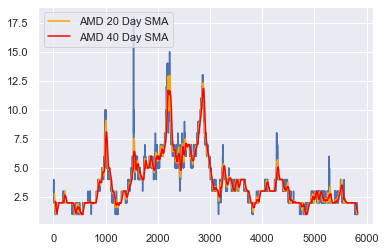

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

ticker = 'AMD'
timeframe = '1y'

plt.plot(data.Price.values)
rolling_mean = data.Price.rolling(window=20).mean()
rolling_mean40 = data.Price.rolling(window=40).mean()

#rolling_mean2 = data.kneePain.rolling(window=50).mean()plt.plot(df.ds, df.y, label='AMD')
plt.plot(rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(rolling_mean40, label='AMD 40 Day SMA', color='red')
#plt.plot(rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

# 5. Trends  <a name="moveav"></a>
Finding and highlighting trends in data is important.
One can use different models, which can identify trends in data. 
Methods of detecting trends and seasonality: 
1. using linear regression models (if you have hypothesis that there must be some logic behind);
2. using Fourier transforms

Alternatively one can use built-in modules, such as `seasonal_decompose` from `statsmodels`. In this case Here, we assume that the model is additive: the value of our variable is given by the summation of the components above:

$Y(t)=level + trend + seasonality + noise$

`seasonal_decompose` takes as an input pandas dataframe, or one subcolumn of dataframe, e.g. in our case data.P1. Variable must be a pandas object with a timeseries index with a freq not set to None


**Comment:** one needs to be careful here when you have very noisy data without any seasonality properties.

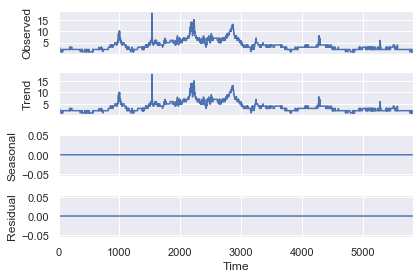

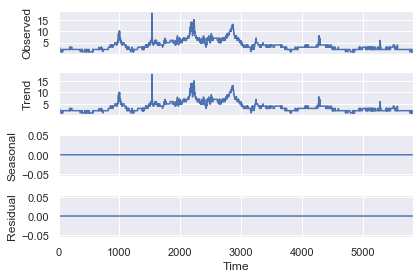

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series



result = seasonal_decompose(data.Price.values, model='additive', freq=1)
result.plot()